Cell Sorting
=============

This example demonstrates constructing a simulation of cell sorting, 
an event where biological cells of different types sort due to 
differential adhesion. 

Basic Setup
------------

Begin by initializing Tissue Forge with an explicit cutoff distance, which defines the maximum distance over which any two particles can interact, 
as well as the number of particles to create for two different particle types. 

In [1]:
import tissue_forge as tf
import numpy as np
from matplotlib import pyplot as plt

# total number of cells
A_count = 5000
B_count = 5000

# potential cutoff distance
cutoff = 3

# dimensions of universe
dim = [20., 20., 20.]

# new simulator
tf.init(dim=dim, cutoff=cutoff)

Particle Types
---------------

Declare two particle types that, other than their rendering style, represent indistinguishable types of cells. 
Since these types represent cell types, use overdamped dynamics. 

In [2]:
class AType(tf.ParticleTypeSpec):
    mass = 40
    radius = 0.4
    dynamics = tf.Overdamped
    style = {'color': 'red'}


A = AType.get()


class BType(tf.ParticleTypeSpec):
    mass = 40
    radius = 0.4
    dynamics = tf.Overdamped
    style = {'color': 'blue'}


B = BType.get()

Differential Adhesion
----------------------

Cells adhere, and the strength of adhesion depends on the type of each of two contacting cells. 
Create Morse potentials for cell adhesion, where heterotypic contact pairs adhere less than 
homotypic contact pairs. 

In [3]:
# create three potentials, one for each pair of contacting types
pot_aa = tf.Potential.morse(d=3, a=5, min=-0.8, max=2)
pot_bb = tf.Potential.morse(d=3, a=5, min=-0.8, max=2)
pot_ab = tf.Potential.morse(d=0.3, a=5, min=-0.8, max=2)

# bind the potentials by type
tf.bind.types(pot_aa, A, A)
tf.bind.types(pot_bb, B, B)
tf.bind.types(pot_ab, A, B)

0

Verify Cell Sorting
--------------------

Dynamics will evolve the system such that it tends towards an energy minimum. 
Verify that the potentials for cell adhesion should create a lowest energy state that results in a sorted configuration. 

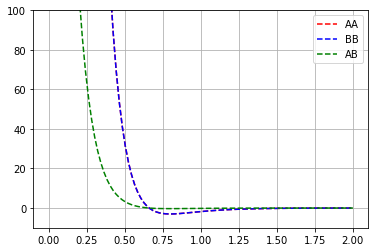

In [4]:
# potential scaling factor
s = A.radius + B.radius

x = np.linspace(0, 2.0, 100)
plt.plot(x, [pot_aa(xx, s) for xx in x], 'r--', label='AA')
plt.plot(x, [pot_bb(xx, s) for xx in x], 'b--', label='BB')
plt.plot(x, [pot_ab(xx, s) for xx in x], 'g--', label='AB')
plt.ylim([-10, 100])
plt.grid(visible=True)
plt.legend()

Cell Motility
--------------

Biologically, cells are motile. Theoretically, a random force enables objects with overdamped dynamics to move around and prevents them from being trapped in a local energy minimum. 
Add a random force to introduce cell motility. 

In [5]:
# create a random force
rforce = tf.Force.random(mean=0, std=50)

# bind the force by type
tf.bind.force(rforce, A)
tf.bind.force(rforce, B)

0

Particle Construction
----------------------

Typical cell sorting experiments begin with a randomly distributed aggregate of cells, where their migration over time leads to a sorted configuration by type. 
Create particles at randomly selected locations. 

In [6]:
for p in np.random.random((A_count, 3)) * 15 + 2.5:
    A(p)

for p in np.random.random((B_count, 3)) * 15 + 2.5:
    B(p)

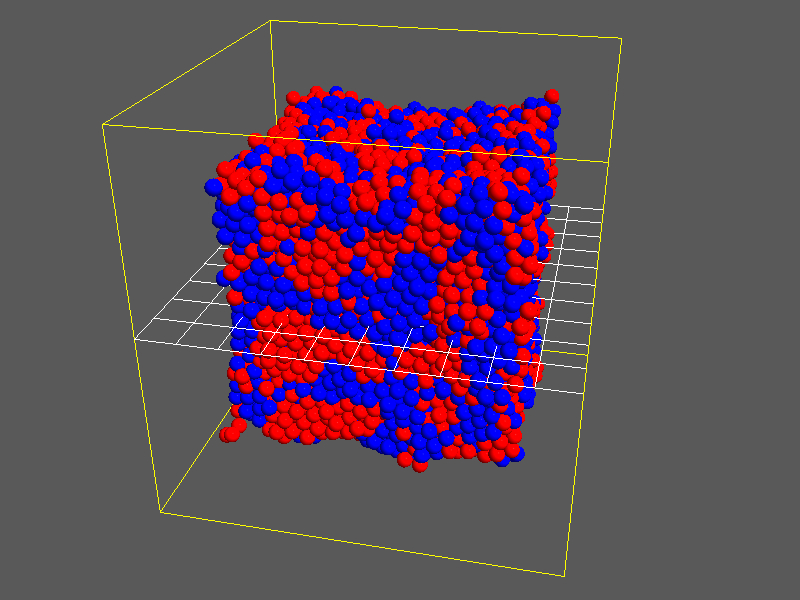

In [7]:
tf.show()